# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [2]:
fitbit = pd.read_csv('../data/FitBit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

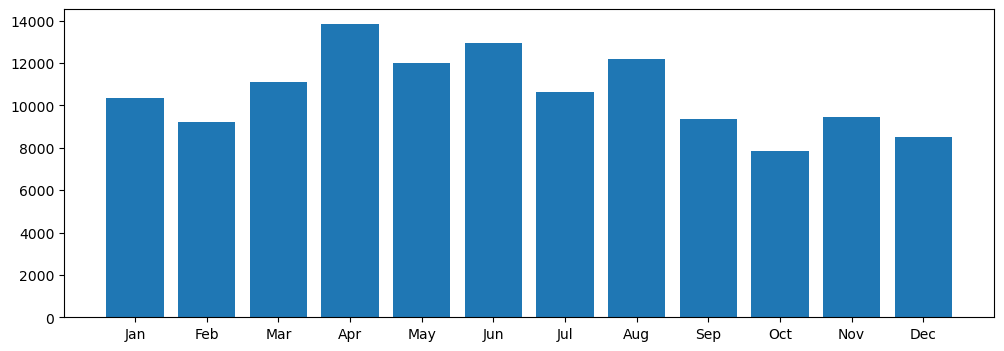

In [3]:
# AVERAGE STEPS BY MONTH_ENCODED
monthly_steps = fitbit.groupby(['Months_encoded'])['Steps'].median()

fig = plt.figure(figsize= (12, 4))

plt.bar(monthly_steps.index, monthly_steps.values)
plt.xticks(monthly_steps.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.savefig('figures/monthly_steps.png')

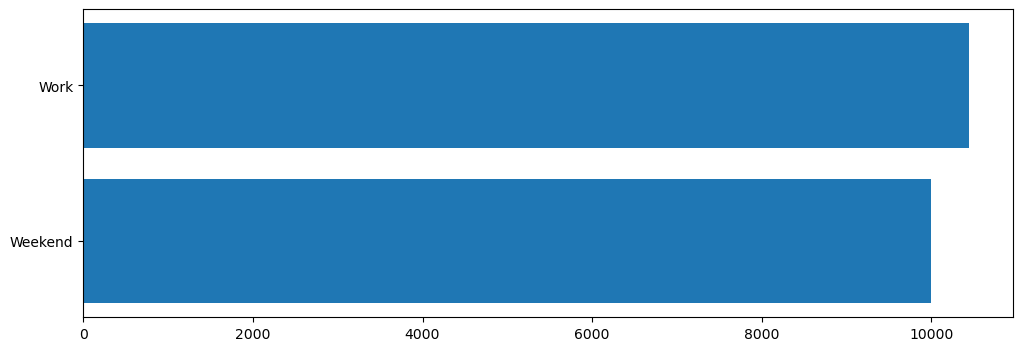

In [4]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
weekly_steps = fitbit.groupby(by= ['Work_or_Weekend'])['Steps'].median()

fig = plt.figure(figsize= (12, 4))

plt.barh(weekly_steps.index, weekly_steps.values)
plt.yticks([0, 1], ['Weekend', 'Work'])
plt.savefig('figures/work_or_weekend.png')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

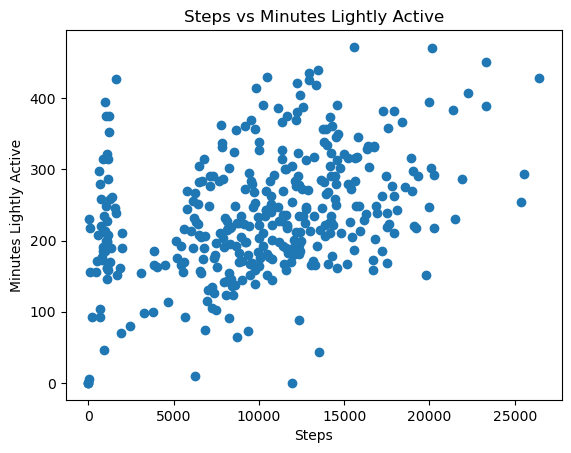

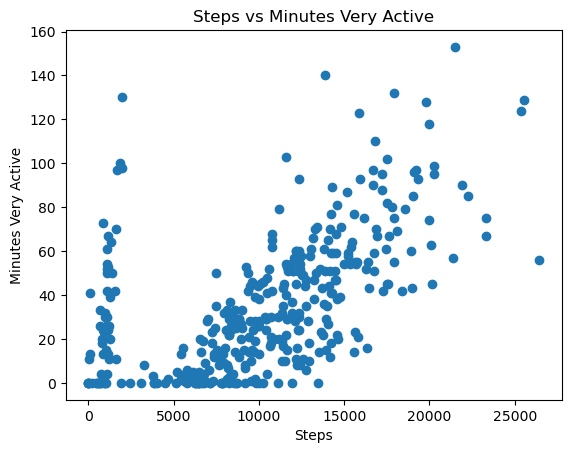

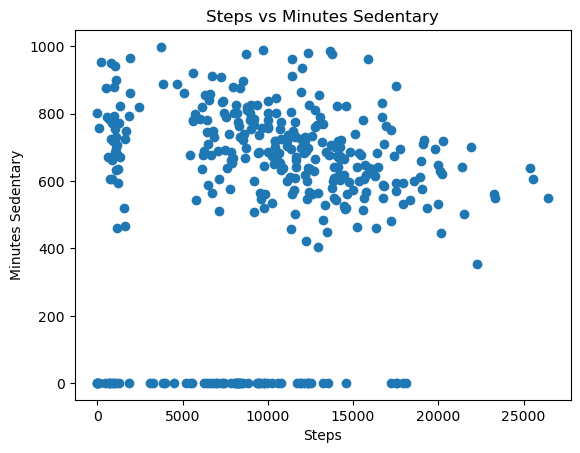

In [5]:
list = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

for i in list:
    plt.figure()
    plt.title(f'Steps vs {i}')
    plt.xlabel('Steps')
    plt.ylabel(i)
    plt.scatter(fitbit['Steps'], fitbit[i])
    plt.savefig(f'figures/{i}.png')


## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [6]:
titanic = pd.read_csv('../data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [7]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [8]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include='number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [9]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include='object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [10]:
plt.figure(figsize=(12,6))
plt.style.use('classic')

<Figure size 1200x600 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot:ylabel='Frequency'>

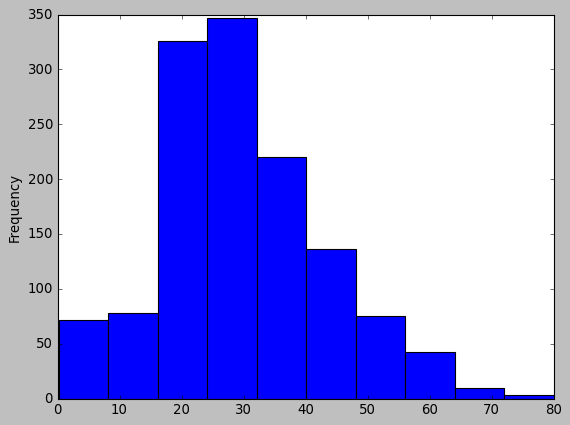

In [11]:
titanic.Age.plot.hist()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<AxesSubplot:ylabel='Frequency'>

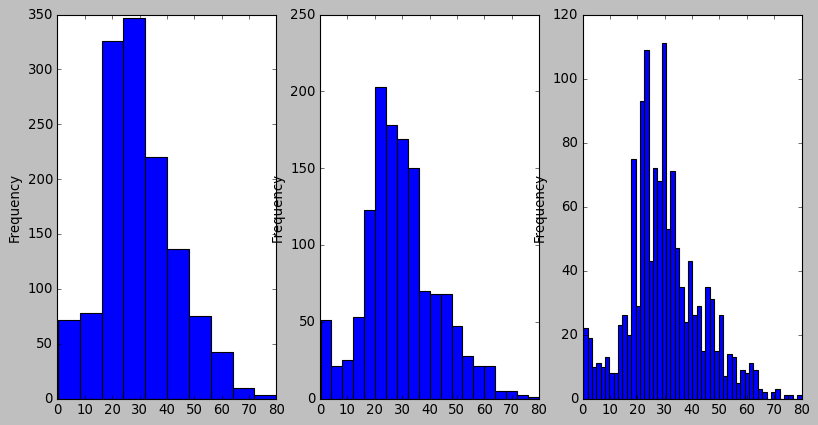

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,6))
titanic.Age.plot.hist(bins=10, ax=axs[0])
titanic.Age.plot.hist(bins=20,  ax=axs[1])
titanic.Age.plot.hist(bins=50,  ax=axs[2])

#### How does the bin size affect your plot?

In [13]:
'''As the number of bins increase the resolution increase'''

'As the number of bins increase the resolution increase'

#### Use seaborn to show the distribution of column `Age`.

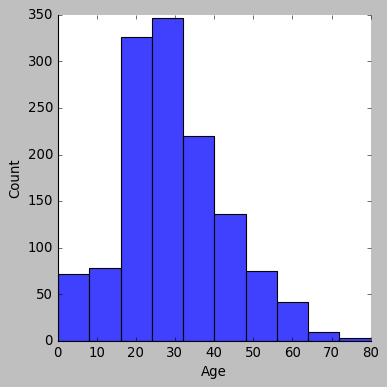

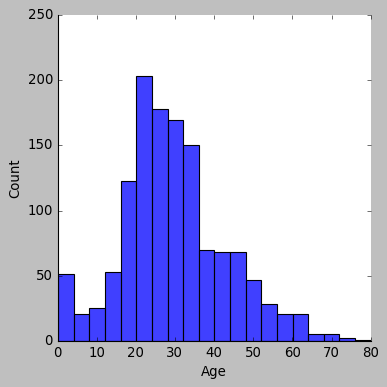

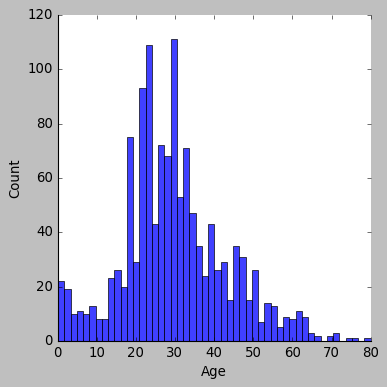

In [14]:
sns.displot(titanic['Age'], bins= 10)
sns.displot(titanic['Age'], bins= 20)
sns.displot(titanic['Age'], bins= 50)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

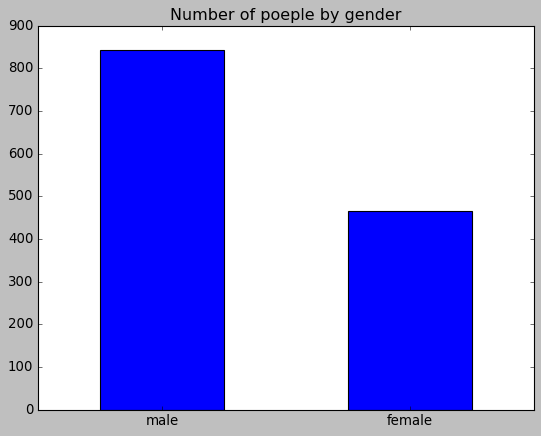

In [15]:
# Method 1 - matplotlib
titanic["Gender"].value_counts().plot(kind="bar", title="Number of poeple by gender")
plt.xticks(rotation=0)

<AxesSubplot:xlabel='Gender', ylabel='count'>

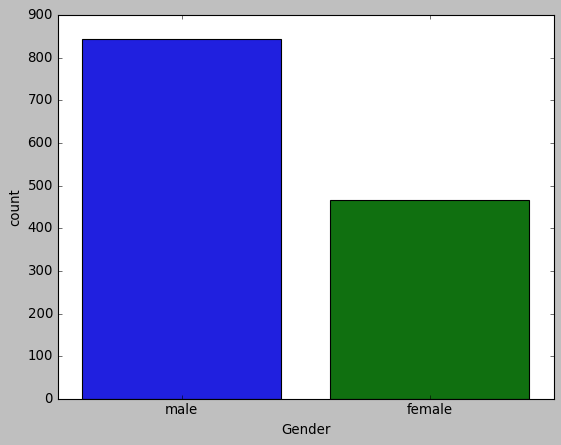

In [16]:
# Method 2 - seaborn
sns.countplot(x= titanic.Gender)

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:>

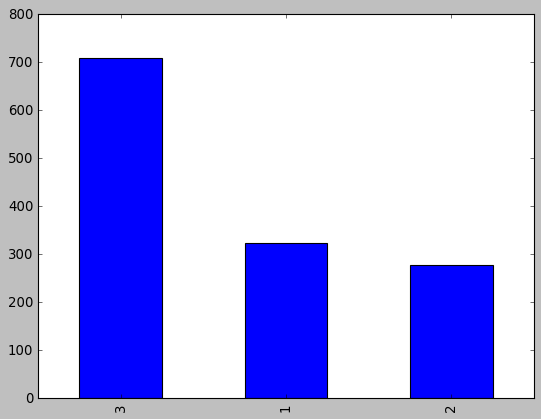

In [17]:
titanic['Pclass'].value_counts().plot.bar()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdf19339450>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdf1933b9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdf19339120>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdf19338370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdf193380d0>],
 'means': []}

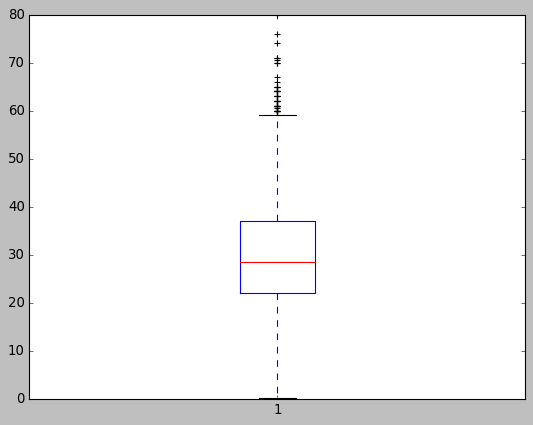

In [18]:
plt.boxplot(titanic.Age)

In [19]:
'''It describes the distribution in a single figure'''

'It describes the distribution in a single figure'

#### What does the last plot tell you about the feature `Age`?

In [20]:
'''The median age in the boat was relatively low and anyone above 60 was an outlier'''

'The median age in the boat was relatively low and anyone above 60 was an outlier'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

/Users/marcdalmau/opt/miniconda3/envs/ironhack/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

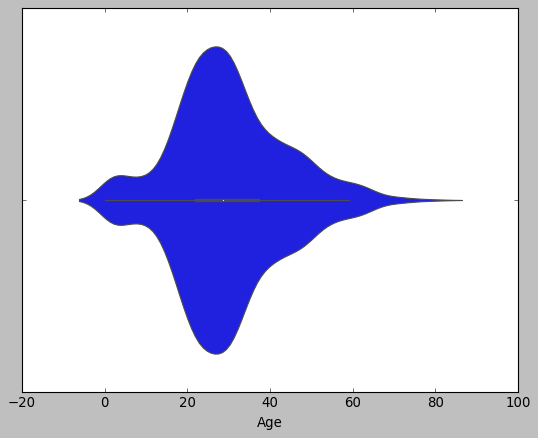

In [21]:
sns.violinplot("Age", data = titanic)

#### What additional information does the last plot provide about feature `Age`?

In [22]:
'''It gives the distribution of all the data points'''

'It gives the distribution of all the data points'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [23]:
# Method 1 - matplotlib
# your code here

In [24]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

In [25]:
# your code here

#### What are the most correlated features?

In [26]:
"""
your comments here
"""

'\nyour comments here\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [27]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [28]:
# your code here